# MNIST Classification

### model

In [37]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# 데이터가 흑백 채널 차원 제거 및 flatten
class ToTensorWithoutChannel(ToTensor):
    def __call__(self, picture):
        img = super(ToTensorWithoutChannel, self).__call__(picture)
        return img[0, :, :].view(-1)

# 손글씨 모델
class MNISTClassificationModel(nn.Module):
    def __init__(self, layers):
        super(MNISTClassificationModel, self).__init__()
        layer_list  = []
        for idx, layer in enumerate(layers):
            in_feat, out_feat = layer
            layer_list.append(nn.Linear(in_features=in_feat, out_features=out_feat))
            if idx < len(layers)-1:
                layer_list.append(nn.ReLU())
        self.layers = nn.Sequential(*layer_list)

    def forward(self, x):
        return self.layers(x)

### train

In [41]:
from sklearn.datasets import make_blobs
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 데이터 셋 생성
def get_dataset(n_samples: int, batch_size: int):
    dataset = MNIST(root="data", train=True, download=True, transform=ToTensorWithoutChannel())
    data_loader = DataLoader(dataset, batch_size=batch_size)
    return DataLoader(dataset=dataset, batch_size=batch_size), dataset.data

# 디바이스 체크
def get_device():
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"

# 학습
def train(data_loader, n_samples, model, loss_function, optimizer, device, y_type=None):
    epoch_loss, epoch_acc = 0., 0

    for X, y in data_loader:

        X, y = X.to(device), y.to(device)

        pred = model(X)
        y = y.type(y_type) if y_type is not None else y
        loss = loss_function(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * len(X)
        is_corrects = torch.argmax(pred, dim=1) == y
        corrects_count = is_corrects.sum().item()
        epoch_acc += corrects_count

    return epoch_loss / n_samples, epoch_acc / n_samples

# 시각화
def vis_losses_accs(losses, accs):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
    axes[0].plot(range(len(losses)), losses)
    axes[0].set_ylabel("BCE Loss")
    axes[1].plot(range(len(accs)), accs)
    axes[1].set_ylabel("Accuracy")
    axes[1].set_xlabel("Epoch")
    plt.show()

### main

Start Learning Rate(0.01)


진행중: 100%|██████████| 10/10 [01:47<00:00, 10.79s/it]


Start Learning Rate(0.02)


진행중: 100%|██████████| 10/10 [01:49<00:00, 10.93s/it]


Start Learning Rate(0.03)


진행중: 100%|██████████| 10/10 [01:56<00:00, 11.68s/it]


Start Learning Rate(0.04)


진행중: 100%|██████████| 10/10 [01:51<00:00, 11.13s/it]


Start Learning Rate(0.05)


진행중: 100%|██████████| 10/10 [01:48<00:00, 10.82s/it]


Start Learning Rate(0.06)


진행중: 100%|██████████| 10/10 [01:49<00:00, 10.95s/it]


Start Learning Rate(0.07)


진행중: 100%|██████████| 10/10 [01:48<00:00, 10.86s/it]


Start Learning Rate(0.08)


진행중: 100%|██████████| 10/10 [01:46<00:00, 10.64s/it]


Start Learning Rate(0.09)


진행중: 100%|██████████| 10/10 [01:45<00:00, 10.54s/it]


Start Learning Rate(0.1)


진행중: 100%|██████████| 10/10 [01:46<00:00, 10.64s/it]


Learning Rate(0.01) - Epoch(9) :   epoch_loss 2.302057268222173,    epoch_acc 0.10781666666666667

Learning Rate(0.02) - Epoch(9) :   epoch_loss 2.301043379306793,    epoch_acc 0.11236666666666667

Learning Rate(0.03) - Epoch(9) :   epoch_loss 2.2681314289569854,    epoch_acc 0.23623333333333332

Learning Rate(0.04) - Epoch(9) :   epoch_loss 2.0538245658079783,    epoch_acc 0.2131

Learning Rate(0.05) - Epoch(9) :   epoch_loss 2.2857112268606823,    epoch_acc 0.11395

Learning Rate(0.06) - Epoch(9) :   epoch_loss 2.2895516753196716,    epoch_acc 0.11991666666666667

Learning Rate(0.07) - Epoch(9) :   epoch_loss 0.9931938732663791,    epoch_acc 0.65075

Learning Rate(0.08) - Epoch(9) :   epoch_loss 2.000196385383606,    epoch_acc 0.21455

Learning Rate(0.09) - Epoch(9) :   epoch_loss 1.5170902093251546,    epoch_acc 0.39316666666666666

Learning Rate(0.1) - Epoch(9) :   epoch_loss 0.21498763641963403,    epoch_acc 0.9445833333333333



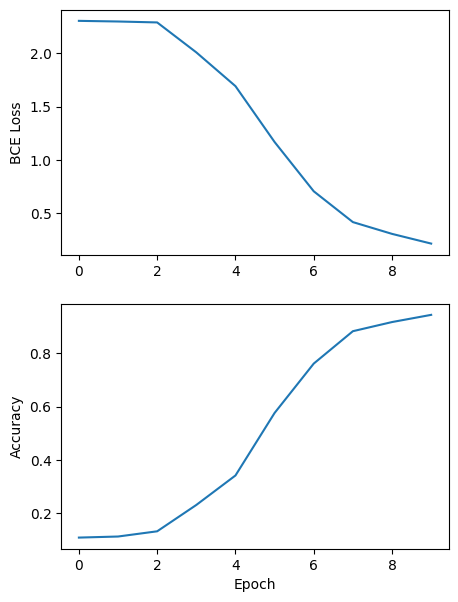

In [64]:
from torch.optim import SGD
from tqdm import tqdm
import time

# hyperparameter
n_samples = 60000
BATCH_SIZE = 500
LR_START = 0.01
LR_STEP = 0.01
LR_REPEAT = 10
LR_LIST = [ round(LR_START + (LR_STEP * n), 2) for n in range(LR_REPEAT) ]
EPOCHS = 10
layers = [
    (784, 200),
    (200, 30),
    (30, 50),
    (50, 15),
    (15, 100),
    (100, 15),
    (15, 10)
]
seed = 42
torch.manual_seed(seed)

# data set
dataset, _ = get_dataset(n_samples=n_samples, batch_size=BATCH_SIZE)
device = get_device()

# train
total_epoch_losses, total_epoch_accs = [], []
for lr in LR_LIST:
    print(f"Start Learning Rate({lr})")
    model = MNISTClassificationModel(layers=layers)
    loss_function = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=lr)
    epoch_losses, epoch_accs = [], []
    for epoch in tqdm(range(EPOCHS), desc="진행중"):
        epoch_loss, epoch_acc = train(data_loader=dataset,
                                        n_samples=n_samples,
                                        model=model,
                                        loss_function=loss_function,
                                        optimizer=optimizer,
                                        device=device,
                                        y_type=torch.long)
        epoch_losses.append(epoch_loss)
        epoch_accs.append(epoch_acc)
    total_epoch_losses.append(epoch_losses)
    total_epoch_accs.append(epoch_accs)

for idx, lr in enumerate(LR_LIST):
    min_loss = np.amin(total_epoch_losses[idx])
    min_index = np.argmin(total_epoch_losses[idx])
    print(f"Learning Rate({lr}) - Epoch({min_index}) :\
            epoch_loss {min_loss}, \
            epoch_acc {total_epoch_accs[idx][min_index]}\n")

vis_losses_accs(total_epoch_losses[-1], total_epoch_accs[-1])